## How can we predict survival on the Titanic?

to do list for self
- 1 apply fcc principles
- 2 apply [https://www.linkedin.com/pulse/what-i-learned-analyzing-famous-titanic-dateset-murilo-gustineli/]
- 3 apply [https://python.plainenglish.io/revitalizing-cyclistic-bike-share-program-an-in-depth-data-exploration-556b52512bf8] - diff dataset but still
- 4 apply others? [https://www.kaggle.com/code/startupsci/titanic-data-science-solutions]

### Guiding Questions
- Which features are correlated with survival?
- Can we accurately predict survival with a simple model?
- Which model performs best on this dataset?


### Dataset description

Columns = description

- PassengerId = unique passenger (int64)
- Survived = binary value of survival outcome; 0 for died; 1 for survived (int64)
- Pclass = class (1st, 2nd, 3rd) (int64)
- Name = string value for name (object)
- Sex = string(? interpreted) value of either "male" or "female" (object)
- Age = (type) passenger's age at time of ? (float64)
- SibSp = sibling/spouse #? (int64)
- Parch = parents/children #? (int64)
- Ticket = (dropped, unhelpful) (object)
- Fare = float(?0) value with ticket price (e.g. 7.25) (float64)
- Cabin = cabin identifer of format XXX (e.g. C85??) (object)- dropped bc uhhelpful?
- Embarked = S/C/Q??? (object)


NOTE - variations to help algorithm?
- deal with fare, cabin, age dropped values differently!

In [37]:
# import statements
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# import train dataset and look at it (ignore test until testing model prediction accuracy at end)
train_df = pd.read_csv('titanic/train.csv')
print(f"Passengers in train set: {train_df.shape[0]}")
test_df = pd.read_csv('titanic/test.csv')
train_df.head()

Passengers in train set: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [27]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.info()

In [9]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
# age group analysis
print(f"Minimum age: {train_df['Age'].min()}. Maximum age: {train_df['Age'].max()}.")
# reasonable!

Minimum age: 0.42. Maximum age: 80.0.


In [ ]:
# check for duplicates
train_df.duplicated("PassengerId").sum()
# no duplicates!

0

In [ ]:
print(train_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Visualizing each variable (pre cleaning/n/a values)

<Axes: xlabel='Embarked', ylabel='count'>

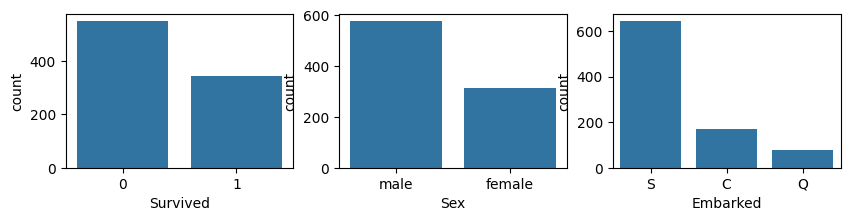

In [83]:
# pre processing
# find null values
# visualizeeee

# null values for Age, Cabin, and Embarked to deal with


#sns.countplot for each categorical attributes cumulative
#AND sns.countplot for each categorical attributes by died/survived
    #survived, sex, embarked

fig, axes = plt.subplots(figsize=(10, 2), nrows=1, ncols=3)
sns.countplot(x="Survived", data=train_df, ax=axes[0])
sns.countplot(x="Sex", data=train_df, ax=axes[1])
sns.countplot(x="Embarked", data=train_df, ax=axes[2])

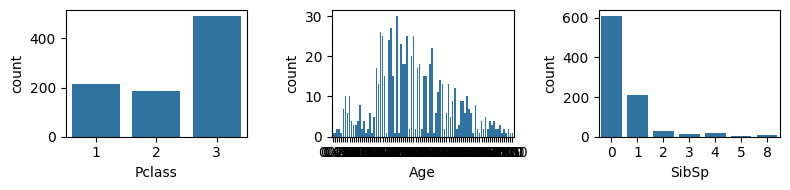

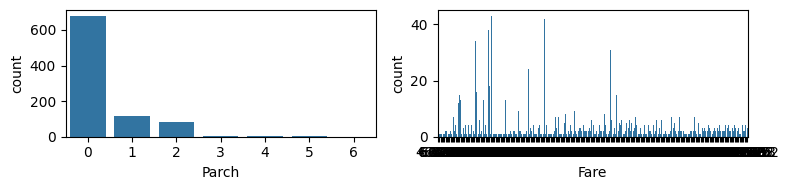

In [77]:
#sns.distplot for numerical attirbutes
#pclass, age, sibsp, parch, fare

fig1, axes1 = plt.subplots(figsize=(8, 2), nrows=1, ncols=3)
fig2, axes2 = plt.subplots(figsize=(8, 2), nrows=1, ncols=2)
sns.countplot(x="Pclass", data=train_df, ax=axes1[0])
sns.countplot(x="Age", data=train_df, ax=axes1[1])
sns.countplot(x="SibSp", data=train_df, ax=axes1[2])
sns.countplot(x="Parch", data=train_df, ax=axes2[0])
sns.countplot(x="Fare", data=train_df, ax=axes2[1])
fig1.tight_layout()
fig2.tight_layout()

In [ ]:
#pivot tables

### EDA

- Visualize survival by class, sex, age, family, fare
- Show correlations (heatmap, groupby stats)
- Write observations inline

### Data Cleaning

- describe data
- Of the estimated 2,224 passengers and crew aboard, approximately 1,500 died (estimates vary) [https://en.wikipedia.org/wiki/Titanic]
- 891 entries in the training set
- 418 in the test set
- 1309 total meaning a rougly 7:3 split for train:test

x

- Inspect nulls
- Drop/recode columns
- Feature engineering (like 'is_alone', deck extraction, etc.)

In [ ]:
# clean as needed
# maybe remove outliers?


train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
# fill age na values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# drop cabin column and name
train_df.drop(axis=1, columns='Cabin', inplace=True)

# drop embarked na rows
train_df.dropna(subset=['Embarked'], inplace=True)

In [91]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


optional stuff to refine it later!

# 11
    pressure_mask = df["ap_lo"] <= df["ap_hi"]
    
    short_mask = df["height"] >= df["height"].quantile(0.025) 
    
    tall_mask = df["height"] <= df["height"].quantile(0.975)
    
    low_weight_mask = df["weight"] >= df["weight"].quantile(0.025)
    
    high_weight_mask = df["weight"] <= df["weight"].quantile(0.975)

    df_heat = df[pressure_mask & short_mask & tall_mask & low_weight_mask & high_weight_mask]



# Clean data
df = df[(df['views'] >= df['views'].quantile(0.025)) & (df['views'] <= df['views'].quantile(0.975))] # 1304 -> 1176


In [ ]:
# how to get column types????
train_df.dtypes



PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Modeling

- 5 models: Logistic Regression, Decision Tree, Random Forest, KNN, Naive Bayes
- Optionally: SVM, Gradient Boosting, or Perceptron
- Compare accuracy, precision, recall, AUC
- Pick a best model + explain why

### 1) Logistic Regression model

- description high level w figs (read articles / watch vids)
- pros and cons in general and for this dataset

[writeup]

In [ ]:
# log reg code
X_train = train_df.copy()
X_train.drop(columns=['Name', 'Ticket', 'Survived'], inplace=True)
y_train = train_df['Survived']
X_test = test_df.copy()
X_test.drop(axis=1, columns='Cabin', inplace=True)
X_test['Age'].fillna(X_test['Age'].median(), inplace=True)
X_test.dropna(subset=['Fare'], inplace=True)
X_test.drop(columns=['Name', 'Ticket'], inplace=True)

In [ ]:
# make all numerical

X_train['Sex'] = X_train['Sex'].map({'male': 0, 'female': 1})
X_test['Sex'] = X_test['Sex'].map({'male': 0, 'female': 1})
X_train['Sex'] = X_train['Sex'].map({'Q': 0, 'S': 1, 'C': 2})
X_test['Sex'] = X_test['Sex'].map({'Q': 0, 'S': 1, 'C': 2})

In [ ]:
X_train

In [143]:
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,27.0,0,0,8.0500,S


In [135]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Sex          417 non-null    object 
 3   Age          417 non-null    float64
 4   SibSp        417 non-null    int64  
 5   Parch        417 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 29.3+ KB


In [ ]:
# !pip install scikit-learn
# log reg!

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

  Using cached scikit_learn-1.7.0-cp310-cp310-macosx_12_0_arm64.whl (10.7 MB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Using cached joblib-1.5.1-py3-none-any.whl (307 kB)


ValueError: could not convert string to float: 'male'

### 2) Decision Tree model

- description high level w figs (read articles / watch vids)
- pros and cons in general and for this dataset

[writeup]

In [ ]:
# decision tree code

### 3) Random Forest

- description high level w figs (read articles / watch vids)
- pros and cons in general and for this dataset

[writeup]

In [ ]:
# random forest code

### 4) KNN model

- description high level w figs (read articles / watch vids)
- pros and cons in general and for this dataset

[writeup]

In [ ]:
# KNN code

### 5) Naive Bayes model

- description high level w figs (read articles / watch vids)
- pros and cons in general and for this dataset

[writeup]

In [6]:
# Naive Bayes code

### 6) SVM model

- description high level w figs (read articles / watch vids)
- pros and cons in general and for this dataset

[writeup]

In [ ]:
# SVM code

### 7) Gradient Boosting model

- description high level w figs (read articles / watch vids)
- pros and cons in general and for this dataset

[writeup]

In [ ]:
# Gradient Boosting code

### 8) Perceptron model

- description high level w figs (read articles / watch vids)
- pros and cons in general and for this dataset

[writeup]

In [ ]:
# Perceptron code

### Final Evaluation

- Confusion matrix, F1, ROC curve
- Feature importance chart

In [5]:
# final eval

[write up too]

### Wrap-up
- Final thoughts, takeaways
- What you’d do next with more time/data
- References or inspiration sources

[writeup]

# References
- Titanic - Machine Learning from Disaster [https://www.kaggle.com/competitions/titanic/data]
- Titanic (wikipedia) [https://en.wikipedia.org/wiki/Titanic]
- cleaning data [https://www.youtube.com/watch?v=cWf08xuSqdU&ab_channel=DataGeekismyname]